In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import  classification_report,  confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv("wine.csv") 
print(df.head()) 
print(df.describe()) # statystyka opisowa 

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  
             Wine     Alcohol  Malic.acid         Ash         Acl          Mg  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.9382

In [3]:
df['Wine'].value_counts()  # Sprawdzenie liczebności klas

Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [4]:
X = df.drop('Wine', axis=1) 
y = df['Wine'] 
print(np.unique(y, return_counts=True)) #ile różnych etykiet i liczebność klas 

(array([1, 2, 3]), array([59, 71, 48]))


In [5]:
# Podział na zbiór treningowy i testowy (dotyczy X i y) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [6]:
da = LinearDiscriminantAnalysis() # LDA 
da.fit(X_train, y_train)  # trenowanie klasyfikatora 
y_train_pred = da.predict(X_train)  # predykcja klas-zbiór terningowy 
y_test_pred = da.predict(X_test)   # predykcja klas - zbiór testowy 

In [7]:
print('Accuracy (train):', accuracy_score(y_train, y_train_pred)) 
print('Accuracy (test):', accuracy_score(y_test, y_test_pred)) 

Accuracy (train): 1.0
Accuracy (test): 1.0


In [ ]:
# Obliczanie współczynników oceny modelu - zbiór testowy (wymaga uzupełnienia) 
# Błąd bo to działa dla klas binarnych a nie wieloklasowych
# print('Precision:', precision_score(y_test, y_test_pred)) 
# print('Recall:', recall_score(y_test, y_test_pred)) 
# print('F1:', f1_score(y_test, y_test_pred))
print('Precision: ', precision_score(y_test, y_test_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_test_pred, average=None))
print('F1: ', f1_score(y_test, y_test_pred, average='macro'))
# macro - średnia arytmetyczna bez ważenia, None - osobna dla każdej klasy

Precision:  1.0
Recall:  [1. 1. 1.]
F1:  1.0


In [10]:
labels = np.unique(y) 
print(classification_report(y_test, y_test_pred, labels=labels)) # raport klasyfikacyjny – zbiór testowy 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



Confusion matrix  (test)


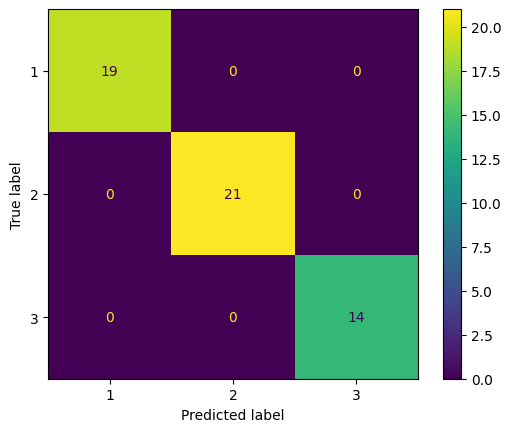

In [11]:
# Macierz pomyłek dla zbioru testowego  
print('Confusion matrix  (test)') 
labels = np.unique(y) 
cm = confusion_matrix(y_test, y_test_pred) 
disp = ConfusionMatrixDisplay(cm, display_labels=labels) 
disp.plot() 
plt.savefig('cm-wines-lda.png') # zapisanie rysunku w pliku 
plt.show() 